In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('Sales_Dataset_PT.csv')
df

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
df.corr()

,Unnamed: 0,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Unnamed: 0,1.000000,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Row ID,1.000000,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [2]:
df = pd.read_csv('Sales_Dataset.csv')
df

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9994 non-null   int64  
 1   Row ID         9994 non-null   int64  
 2   Order ID       9994 non-null   object 
 3   Order Date     9994 non-null   object 
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9994 non-null   int64  
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

In [4]:
df[["Order Date", "Ship Date"]] = df[["Order Date", "Ship Date"]].apply(pd.to_datetime)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     9994 non-null   int64         
 1   Row ID         9994 non-null   int64         
 2   Order ID       9994 non-null   object        
 3   Order Date     9994 non-null   datetime64[ns]
 4   Ship Date      9994 non-null   datetime64[ns]
 5   Ship Mode      9994 non-null   object        
 6   Customer ID    9994 non-null   object        
 7   Customer Name  9994 non-null   object        
 8   Segment        9994 non-null   object        
 9   Country        9994 non-null   object        
 10  City           9994 non-null   object        
 11  State          9994 non-null   object        
 12  Postal Code    9994 non-null   int64         
 13  Region         9994 non-null   object        
 14  Product ID     9994 non-null   object        
 15  Category       9994 n

In [9]:
df.to_csv(r'C:\Users\Admin\Downloads\Sales_Dataset.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380620 entries, 0 to 380619
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   380620 non-null  int64  
 1   InvoiceNo    380620 non-null  int64  
 2   StockCode    380620 non-null  object 
 3   Description  380620 non-null  object 
 4   Quantity     380620 non-null  int64  
 5   InvoiceDate  380620 non-null  object 
 6   UnitPrice    380620 non-null  float64
 7   CustomerID   380620 non-null  float64
 8   Country      380620 non-null  object 
 9   Sales        380620 non-null  float64
 10  profits      380620 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 31.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4996.500000,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,0.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2498.250000,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4996.500000,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7494.750000,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9993.000000,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


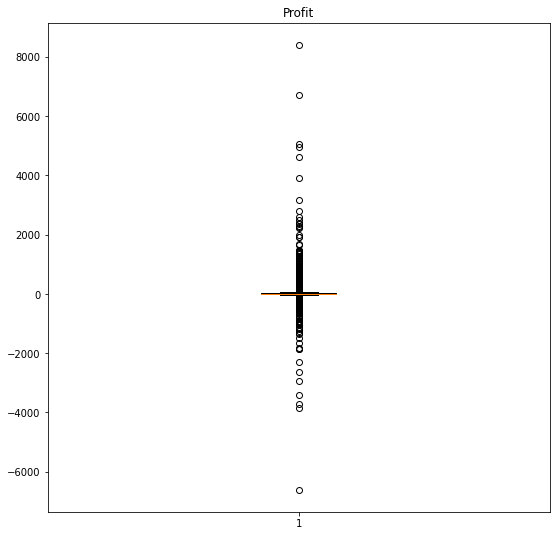

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(9, 9))

axs.boxplot(df["Profit"])
axs.set_title("Profit")


plt.show()

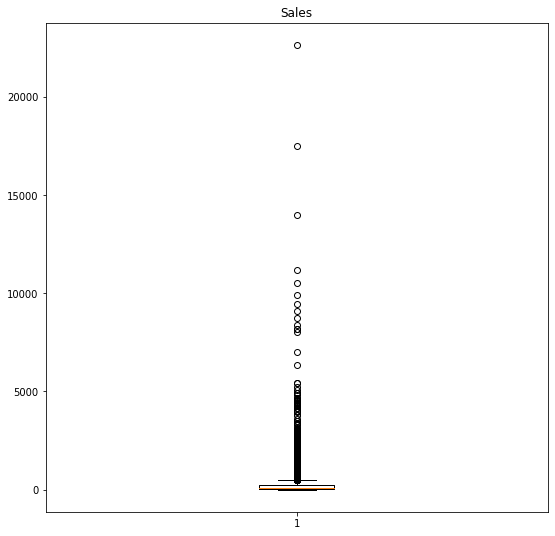

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(9, 9))

axs.boxplot(df["Sales"])
axs.set_title("Sales")


plt.show()

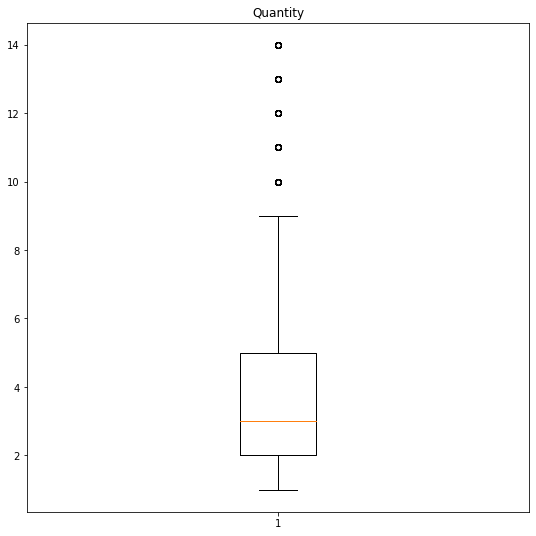

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(9, 9))

axs.boxplot(df["Quantity"])
axs.set_title("Quantity")


plt.show()

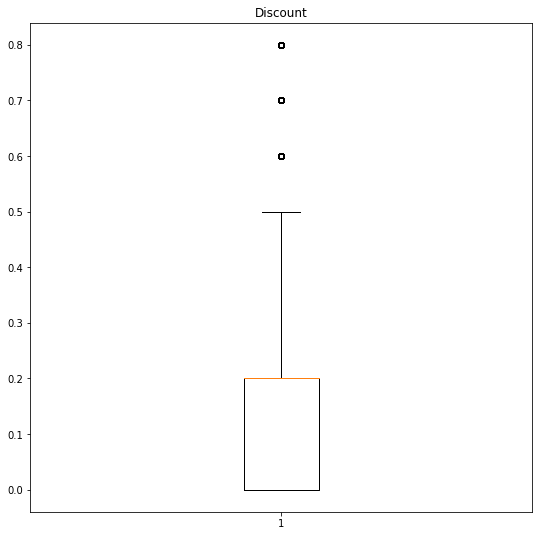

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(9, 9))

axs.boxplot(df["Discount"])
axs.set_title("Discount")


plt.show()

In [ ]:
df.groupby('StockCode').agg(
    {
        'Quantity':'sum',
        'Sales':'sum',
        'profits': 'sum',
        'UnitPrice': 'mean'
    }
).round(2)


,Quantity,Sales,profits,UnitPrice
StockCode,,,,
10002,823,699.55,8.33,0.85
10080,291,114.41,1.34,0.41
10120,187,39.27,0.91,0.21
10123C,5,3.25,0.39,0.65
10124A,16,6.72,0.32,0.42
...,...,...,...,...
C2,131,6536.00,2088.40,50.14
DOT,15,10307.10,3587.01,687.14
M,6360,53341.83,18364.05,175.71


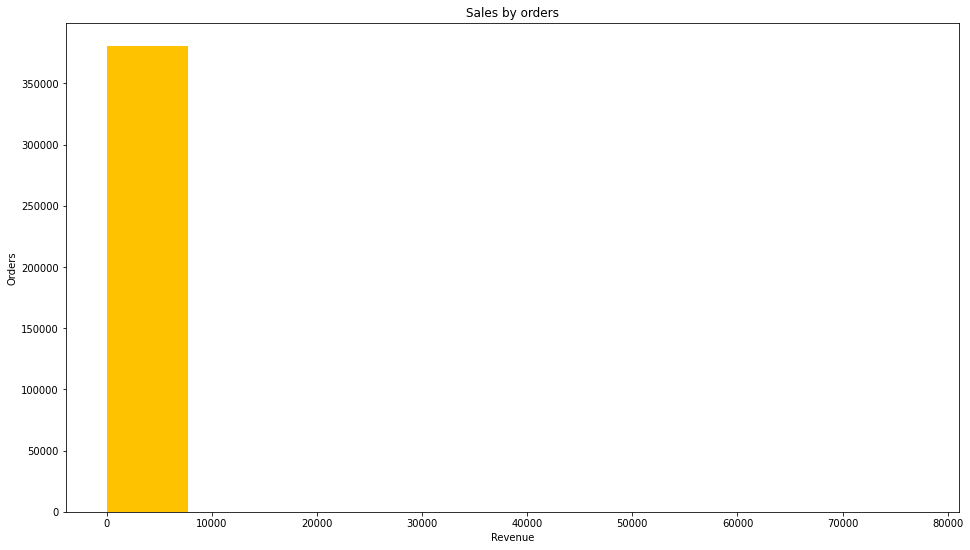

In [ ]:
from matplotlib.figure import AxesStack
fig, axs = plt.subplots(1,1, figsize=(16, 9))
df_s = df["Sales"]

axs.hist(df_s, color = '#FEC200',density=False)
axs.set_title("Sales by orders")
axs.set_xlabel("Revenue")
axs.set_ylabel("Orders")

lst = [1, 3, 5, 7, 9, 12, 17]
lst_scaling = [1/17, 3/17, 5/17, 9/17, 12/17, 17/17]

'''
for rect in axs.patches:
    height = rect.get_height()
    axs.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
'''

plt.show()

In [ ]:
df = df.loc[df['Quantity'] > 0]
df.shape

(531285, 8)

In [ ]:
df_nml = df[["Quantity", "Sales", "profits"]]

from sklearn.preprocessing import StandardScaler
X = df_nml.values[:,1:]
X = np.nan_to_num(X)

df_afn = StandardScaler().fit_transform(X)
df_afn

array([[-0.0426718 , -0.02235486],
       [-0.01081694,  0.0008796 ],
       [-0.00032506, -0.01682285],
       ...,
       [-0.06049535, -0.0353551 ],
       [-0.08912681,  0.13617196],
       [-0.10176763,  0.0785468 ]])

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [ ]:
df = df[pd.notnull(df['CustomerID'])]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
print('Invoice Date Range: %s - %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Invoice Date Range: 2010-12-01 08:26:00 - 2011-12-09 12:50:00


In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']
df.shape

(380620, 8)

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_17856\617658854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
Order_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})
Order_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

In [ ]:
Order_df = Order_df.reset_index()
Order_df

,CustomerID,InvoiceNo,Sales,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00
1,12347.0,537626,711.79,2010-12-07 14:57:00
2,12347.0,542237,475.39,2011-01-26 14:30:00
3,12347.0,549222,636.25,2011-04-07 10:43:00
4,12347.0,556201,382.52,2011-06-09 13:01:00
...,...,...,...,...
17753,18283.0,578262,313.65,2011-11-23 13:27:00
17754,18283.0,579673,223.61,2011-11-30 12:59:00
17755,18287.0,554065,765.28,2011-05-22 10:39:00
17756,18287.0,570715,1001.32,2011-10-12 10:23:00


In [ ]:
summary_df = Order_df.groupby('CustomerID').agg({'Sales':[np.min, np.max, np.sum, np.mean, np.count_nonzero], 
                                                'InvoiceDate':[np.max, np.min]})
summary_df

Sales                                                  \
                amin      amax       sum          mean count_nonzero   
CustomerID                                                             
12346.0     77183.60  77183.60  77183.60  77183.600000             1   
12347.0       382.52   1294.32   4085.18    680.863333             6   
12348.0       227.44    892.80   1797.24    449.310000             4   
12349.0      1757.55   1757.55   1757.55   1757.550000             1   
12350.0       334.40    334.40    334.40    334.400000             1   
...              ...       ...       ...           ...           ...   
18280.0       180.60    180.60    180.60    180.600000             1   
18281.0        80.82     80.82     80.82     80.820000             1   
18282.0       100.21    100.21    100.21    100.210000             1   
18283.0         1.95    313.65   1886.88    125.792000            15   
18287.0        70.68   1001.32   1837.28    612.426667             3   

                   InvoiceDate                      
                          amax                amin  
CustomerID                                          
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00  
12347.0    2011-10-31 12:25:00 2010-12-07 14:57:00  
12348.0    2011-09-25 13:13:00 2010-12-16 19:09:00  
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00  
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00  
...                        ...                 ...  
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00  
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00  
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00  
18283.0    2011-11-30 12:59:00 2011-01-06 14:14:00  
18287.0    2011-10-28 09:29:00 2011-05-22 10:39:00  

[4298 rows x 7 columns]

In [ ]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df = summary_df.reset_index()
summary_df.head()

,CustomerID,sales_amin,sales_amax,sales_sum,sales_mean,sales_count_nonzero,invoicedate_amax,invoicedate_amin
0,12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00
1,12347.0,382.52,1294.32,4085.18,680.863333,6,2011-10-31 12:25:00,2010-12-07 14:57:00
2,12348.0,227.44,892.80,1797.24,449.310000,4,2011-09-25 13:13:00,2010-12-16 19:09:00
3,12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00
4,12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00


In [ ]:
summary_df = summary_df.rename(columns = {'sales_amin' : 'sales_min'
                            ,'sales_amax' : 'sales_max'
                            ,'sales_mean' : 'sales_avg'
                            ,'sales_count_nonzero' : 'sales_number'
                            ,'invoicedate_amax' : 'last_invoicedate'
                            ,'invoicedate_amin' : 'first_invoicedate'})

In [ ]:
summary_df['invoicedate_duration'] = (summary_df['last_invoicedate'] - summary_df['first_invoicedate'])
summary_df

,CustomerID,sales_min,sales_max,sales_sum,sales_avg,sales_number,last_invoicedate,first_invoicedate,invoicedate_duration
0,12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0 days 00:00:00
1,12347.0,382.52,1294.32,4085.18,680.863333,6,2011-10-31 12:25:00,2010-12-07 14:57:00,327 days 21:28:00
2,12348.0,227.44,892.80,1797.24,449.310000,4,2011-09-25 13:13:00,2010-12-16 19:09:00,282 days 18:04:00
3,12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0 days 00:00:00
4,12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...
4293,18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0 days 00:00:00
4294,18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0 days 00:00:00
4295,18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0 days 00:00:00
4296,18283.0,1.95,313.65,1886.88,125.792000,15,2011-11-30 12:59:00,2011-01-06 14:14:00,327 days 22:45:00


In [ ]:
repeat_customer = summary_df.loc[summary_df['invoicedate_duration'] > '0 days 00:00:00']
repeat_customer

,CustomerID,sales_min,sales_max,sales_sum,sales_avg,sales_number,last_invoicedate,first_invoicedate,invoicedate_duration
1,12347.0,382.52,1294.32,4085.18,680.863333,6,2011-10-31 12:25:00,2010-12-07 14:57:00,327 days 21:28:00
2,12348.0,227.44,892.80,1797.24,449.310000,4,2011-09-25 13:13:00,2010-12-16 19:09:00,282 days 18:04:00
5,12352.0,120.33,840.30,2506.04,313.255000,8,2011-11-03 14:37:00,2011-02-16 12:33:00,260 days 02:04:00
9,12356.0,58.35,2271.62,2811.43,937.143333,3,2011-11-17 08:40:00,2011-01-18 09:50:00,302 days 22:50:00
12,12359.0,547.50,2876.85,6372.58,1593.145000,4,2011-10-13 12:47:00,2011-01-12 12:43:00,274 days 00:04:00
...,...,...,...,...,...,...,...,...,...
4286,18270.0,111.95,171.20,283.15,141.575000,2,2011-11-01 13:57:00,2011-03-18 12:41:00,228 days 01:16:00
4287,18272.0,340.72,753.66,2710.70,542.140000,5,2011-10-25 11:52:00,2011-04-07 09:35:00,201 days 02:17:00
4288,18273.0,51.00,102.00,153.00,76.500000,2,2011-09-05 11:27:00,2011-03-27 11:22:00,162 days 00:05:00
4296,18283.0,1.95,313.65,1886.88,125.792000,15,2011-11-30 12:59:00,2011-01-06 14:14:00,327 days 22:45:00


<AxesSubplot:xlabel='sales_number'>

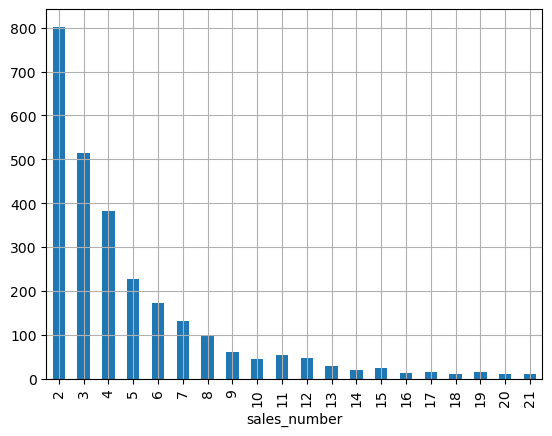

In [ ]:
ax = repeat_customer.groupby('sales_number').count()['CustomerID'][0:20].plot(kind = 'bar', grid=True)
ax